# Use Python Access Obj Detection LMDB

In [26]:
%matplotlib inline
from __future__ import print_function
import caffe
import lmdb
import numpy as np
from PIL import Image
import cStringIO as StringIO

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 15.0)  # in inches?

In [2]:
#lmdb_env = lmdb.open('VOC0712_test_lmdb')  # dir containing lmdb
lmdb_env = lmdb.open('/local/mnt/workspace/qgao/Github/caffe-ssd/examples/COCO/valminusminival2014_lmdb')
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()
datum = caffe.proto.caffe_pb2.AnnotatedDatum() # Annotateddatum is for object detection

In [3]:
voc_label = ('background',
            'aeroplane',           'bicycle',
            'bird',            'boat',
            'bottle',            'bus',
            'car',            'cat',
            'chair',            'cow',
            'diningtable',            'dog',
            'horse',            'motorbike',
            'person',            'pottedplant',
            'sheep',            'sofa',
            'train',            'tvmonitor'
        )

00000038_COCO_val2014/JPEGImages/COCO_val2014_000000423618.jpg: 640x480x3


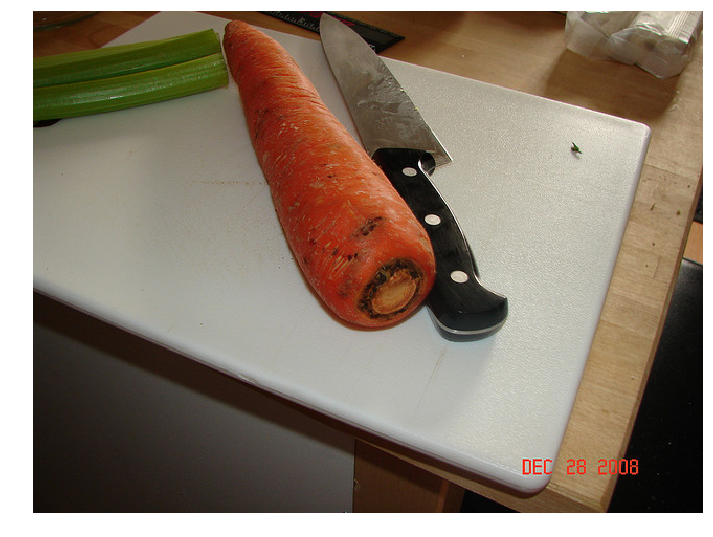

In [27]:
plt.axis('off')
n = 0
for k, v in lmdb_cursor:
    datum.ParseFromString(v)
    # datum has 3 fields:
    #  - type: should be zero for BBOX
    #  - datum is the image data (encoded). It has the following fields
    #    - width
    #    - height
    #    - channels
    #    - encoded
    #    - data: a str for the image data
    #  - annotation_group (see below)
    width = datum.datum.width
    height = datum.datum.height
    print('{}: {}x{}x{}'.format(k, width, height, datum.datum.channels))  
    
    # doesn't work for encoded image
    # img = caffe.io.datum_to_array(datum.datum)
    # plt.imshow(img)
    # decode encoded image data
    stream = StringIO.StringIO(datum.datum.data)
    image = np.uint8(Image.open(stream))  # decode encoded image to RGB 
    #image_bgr = image[...,::-1]    # RGB to BGR
    plt.imshow(image)
    break
    
    for per_class_anno in datum.annotation_group: # RepeatedCompositeFieldContainer
        # per_class_anno has the following fields:
        #  - group_label: class label for the bboxes in 'annotation' 
        #  - annotation:  a list of bboxes all of which have the same label 'group_label'
        for a in per_class_anno.annotation:
            print(' {:4d} {:4d} {:4d} {:4d} {}'.format(
                  int(a.bbox.xmin * width+0.5),
                  int(a.bbox.ymin * height+0.5),
                  int(a.bbox.xmax * width+0.5),
                  int(a.bbox.ymax * height+0.5),
                  voc_label[per_class_anno.group_label])
            )
    n += 1
    if n >= 20:    break